In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
preprints_df = pd.read_csv("output/biorxiv_article_metadata.tsv", sep="\t",)

In [3]:
preprints_df["date_received"] = pd.to_datetime(preprints_df["date_received"])

In [4]:
xml_df = (
    preprints_df.sort_values(by="date_received")
    .dropna(subset=["date_received"])
    .groupby("doi")
    .first()
)

In [5]:
api_df = pd.read_csv("output/biorxiv_published_api_data.tsv", sep="\t")

In [6]:
api_df[api_df["published_date"].str.contains(":")]

,biorxiv_doi,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count
7791,10.1101/206003,10.1162/jocn_a_01258,Signposts in the fog: Objects facilitate scene...,neuroscience,2017-10-19,2018-03-21:1-11,1
8780,10.1101/192518,10.1162/jocn_a_01281,Stimulus familiarity and expectation jointly m...,neuroscience,2017-09-22,2018-05-15:1-12,2
12438,10.1101/162495,10.1111/desc.12744,Laterality of the frontal aslant tract (FAT) e...,neuroscience,2017-07-12,2018-08-30:e12744,1
14422,10.1101/249367,10.1091/mbc.E18-08-0515,Methionine coordinates a hierarchically organi...,systems biology,2018-01-17,2018-10-24:mbcE18080,0
14787,10.1101/228379,10.1096/fj.201800242R,KDM2B is a histone H3K79 demethylase and induc...,genetics,2017-12-04,2018-05-15:fj2018002,3
15413,10.1101/229146,10.1017/S1355617718000929,Longitudinal standards for mid-life cognitive ...,neuroscience,2017-12-04,2018-11-28:1-14,0
21487,10.1101/327080,10.1002/prca.201800100,Urine proteome changes in a TNBS-induced colit...,molecular biology,2018-05-21,2019-05-16:e1800100,0
21506,10.1101/388579,10.1017/S1431927619000606,Fluorescence-Based Detection of Fusion State o...,biophysics,2018-08-10,2019-05-14:1-8,0
23646,10.1101/455055,10.1080/0284186X.2019.1633015,Influence of mutagenic versus non-mutagenic pr...,cancer biology,2018-10-29,2019-07-4:1-9,0


In [7]:
index = api_df[api_df["published_date"].str.contains(":")].index
api_df.loc[index, "published_date"] = (
    api_df.loc[index, "published_date"].str.split(":").str[0]
)

In [8]:
for col in ["preprint_date", "published_date"]:
    api_df[col] = pd.to_datetime(api_df[col])

In [9]:
api_df.set_index("biorxiv_doi")

,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count
biorxiv_doi,,,,,,
10.1101/001081,10.1093/bioinformatics/btu121,PyRAD: assembly of de novo RADseq loci for phy...,Bioinformatics,2013-12-03,2014-03-05,184
10.1101/001297,10.1371/journal.pone.0085203,Aerodynamic characteristics of a feathered din...,Biophysics,2013-12-10,2014-01-15,11
10.1101/000422,10.3389/fgene.2014.00013,On the optimal trimming of high-throughput mRN...,Bioinformatics,2013-11-14,2014-01-31,44
10.1101/001396,10.1162/NECO_a_00568,Parametric inference in the large data limit u...,Biophysics,2013-12-13,2014-03-10,4
10.1101/002980,10.1016/j.bpj.2014.01.012,Genetic drift suppresses bacterial conjugation...,Biophysics,2014-02-24,2014-02-18,10
...,...,...,...,...,...,...
10.1101/2020.05.04.077420,10.1016/j.csbj.2020.05.015,Abasy Atlas v2.2: The most comprehensive and u...,systems biology,2020-05-05,2020-05-16,0
10.1101/851618,10.7554/eLife.50138,Axon-dependent expression of YAP/TAZ mediates ...,neuroscience,2019-11-21,2020-05-21,0
10.1101/2020.03.04.977322,10.1126/sciadv.aba1933,Multimodal mapping of neural activity and cere...,neuroscience,2020-03-05,2020-05-22,0


In [10]:
merged_df = pd.merge(
    xml_df,
    api_df.set_index("biorxiv_doi"),
    left_index=True,
    right_index=True,
    how="outer",
)

In [11]:
merged_df

,author_type,heading,category,document,date_received,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count
10.1101/000026,regular article,new results,genetics,000026.xml,2013-10-17,10.1371/journal.pgen.1004412,A Population Genetic Signature of Polygenic Lo...,Genetics,2013-11-07,2014-08-07,133.0
10.1101/000042,regular article,new results,genomics,000042.xml,2013-10-18,10.1038/nrg3723,Routes for breaching and protecting genetic pr...,Genomics,2013-11-07,2014-06-01,116.0
10.1101/000067,regular article,new results,genomics,000067.xml,2013-10-18,10.1038/nature12904,Genetics of single-cell protein abundance vari...,Genomics,2013-11-07,2014-02-27,50.0
10.1101/000075,NaN,NaN,NaN,NaN,NaT,10.1109/ACC.2014.6859452,A Scalable Formulation for Engineering Combina...,Evolutionary Biology,2013-11-07,2014-06-04,16.0
10.1101/000091,regular article,new results,synthetic biology,000091.xml,2013-10-23,NaN,NaN,NaN,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10.1101/872853,regular article,new results,cell biology,872853.xml,2019-12-11,NaN,NaN,NaN,NaT,NaT,NaN
10.1101/872879,regular article,new results,biochemistry,872879.xml,2019-12-11,10.1038/s41467-020-14898-6,Structure of the processive human Pol δ holoen...,biochemistry,2019-12-11,2020-02-28,0.0
10.1101/872952,regular article,new results,cell biology,872952.xml,2019-12-11,NaN,NaN,NaN,NaT,NaT,NaN
10.1101/873109,regular article,new results,developmental biology,873109.xml,2019-12-11,NaN,NaN,NaN,NaT,NaT,NaN


In [12]:
merged_df["document"].isna().sum()

45

In [13]:
merged_df["published_doi"].isna().sum()

43429

In [14]:
len(merged_df)

80440

In [15]:
# lets ignore papers we don't have xmls for
merged_df = pd.merge(
    xml_df,
    api_df.set_index("biorxiv_doi"),
    left_index=True,
    right_index=True,
    how="left",
)

In [16]:
merged_df["published"] = ~merged_df["published_doi"].isna()

In [17]:
# I should change this to when the data was pulled, but I didn't record that for now :(
merged_df.loc[merged_df["published"], "observation_date"] = merged_df.loc[
    merged_df["published"], "published_date"
]
merged_df.loc[~merged_df["published"], "observation_date"] = pd.datetime.today()

/home/thielk/envs/misc/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


In [18]:
merged_df["observation_duration"] = (
    merged_df["observation_date"] - merged_df["date_received"]
)

In [19]:
(merged_df["observation_duration"] < pd.Timedelta(0)).sum()

100

In [20]:
merged_df = merged_df[merged_df["observation_duration"] > pd.Timedelta(0)]

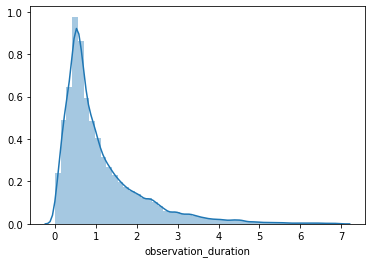

In [21]:
ax = sns.distplot(
    merged_df["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365
)

In [22]:
kmf = KaplanMeierFitter()

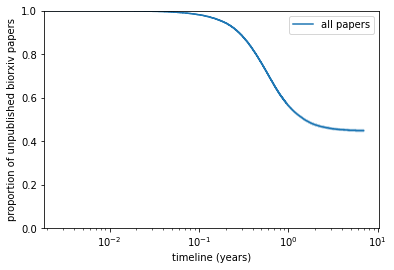

In [23]:
kmf.fit(
    merged_df["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365,
    event_observed=merged_df["published"],
)
ax = kmf.plot(label="all papers", logx=True)
_ = ax.set_ylabel("proportion of unpublished biorxiv papers")
_ = ax.set_xlabel("timeline (years)")
_ = ax.set_ylim(0, 1)

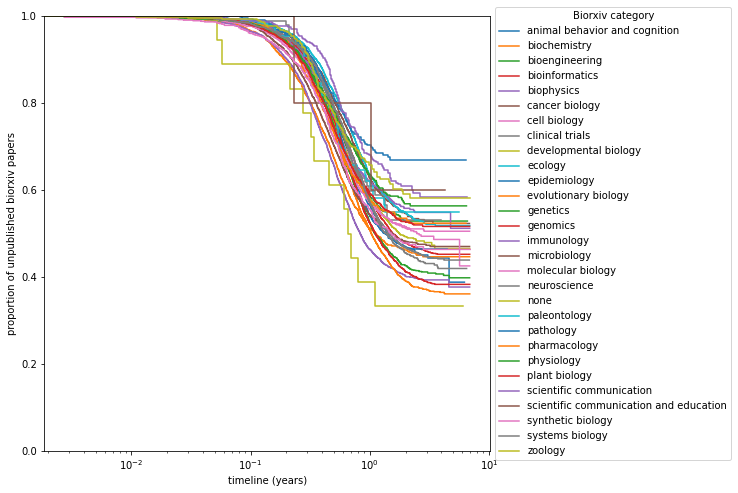

In [24]:
f = plt.figure(figsize=(10, 8))

ax = None
for category, cat_group in merged_df.groupby("category"):
    kmf.fit(
        cat_group["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365,
        event_observed=cat_group["published"],
    )
    ax = kmf.plot(label=category, ax=ax, ci_show=False, logx=True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Biorxiv category")

_ = ax.set_ylabel("proportion of unpublished biorxiv papers")
_ = ax.set_xlabel("timeline (years)")
_ = ax.set_ylim(0, 1)

In [25]:
merged_df["doi_prefix"] = merged_df["published_doi"].str.split("/").str[0]

CPU times: user 1.62 s, sys: 12.5 ms, total: 1.63 s
Wall time: 1.63 s


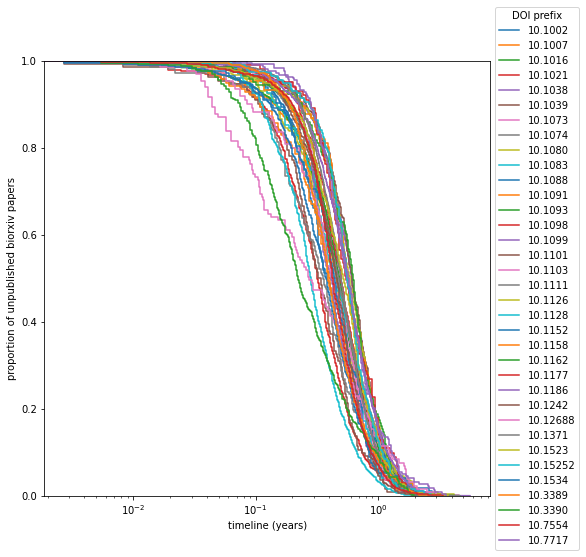

In [26]:
%%time
f = plt.figure(figsize=(10, 8))

ax = None
for category, cat_group in merged_df.groupby("doi_prefix"):
    if len(cat_group) > 100:
        kmf.fit(
            cat_group["observation_duration"].dt.total_seconds() / 60 / 60 / 24 / 365,
            event_observed=cat_group["published"],
        )
        ax = kmf.plot(label=category, ax=ax, ci_show=False, logx=True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="DOI prefix")

_ = ax.set_ylabel("proportion of unpublished biorxiv papers")
_ = ax.set_xlabel("timeline (years)")
_ = ax.set_ylim(0, 1)

In [27]:
%%time
doi_prefix_df = merged_df.groupby("doi_prefix").apply(
    lambda cat_group: pd.Series(
        {
            "count": len(cat_group),
            "80th_percentile": kmf.fit(
                cat_group["observation_duration"].dt.total_seconds() / 60 / 60 / 24,
                event_observed=cat_group["published"],
            ).percentile(0.8),
        }
    )
)

/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: Ap

CPU times: user 6.01 s, sys: 98.2 ms, total: 6.11 s
Wall time: 6.02 s


/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  exceptions.ApproximationWarning,
/home/thielk/envs/misc/lib/python3.6/site-packages/lifelines/fitters/__init__.py:277: Ap

In [28]:
doi_prefix_df[doi_prefix_df["count"] > 50].sort_values("80th_percentile").head()

,count,80th_percentile
doi_prefix,,
10.12688,131.0,27.0
10.3390,400.0,38.0
10.1128,1168.0,56.0
10.1074,219.0,57.0
10.1094,54.0,59.0


F1000 Research Ltd <== 10.12688

MDPI AG <== 10.3390 - wikipedia notes questionable quality of peer-review